In [2]:
import pandas as pd

In [ ]:
data_test = pd.read_csv('./dataset/test.csv')
data_survived = pd.read_csv('./dataset/survived.csv')

data_test_new = pd.merge(data_test, data_survived, on='PassengerId')
data_test_merged = data_test.merge(data_survived, on='PassengerId', how='outer', indicator=True)
print({
	"right_only": len(data_test_merged[data_test_merged['_merge'] == 'right_only']),
	"left_only": len(data_test_merged[data_test_merged['_merge'] == 'left_only']),
	"both": len(data_test_merged[data_test_merged['_merge'] == 'both'])
})
data_test_merged.drop('_merge', axis=1, inplace=True)

In [ ]:
data_test_merged

### **1. Análisis Exploratorio - Train Data**

In [3]:
#Lectura del data set

df_titanic = pd.read_csv("train.csv")

In [4]:
#Revisión de la estructura de la base de datos

df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Análisis de los tipos de datos

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Análisis de Registros duplicados**

In [10]:
duplicados = df_titanic.duplicated('PassengerId').sum()

print("El número de registros duplicados por ID de pasajero es: ", duplicados)

El número de registros duplicados por ID de pasajero es:  0


**Análisis de Datos Nulos**

In [11]:
#Identificación de datos nulos en la BD

print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
#Manejo de datos nulos para la variable edad. Se lleva a cabo la imputación por la mediana

df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

In [13]:
#Manejo de datos nulos para la variable Embarked

df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [14]:
# La variable Embarked se eliminará del Dataset debido a una alta presencia de datos nulos. 

df_titanic.drop(columns='Cabin', inplace=True)


**Análisis** 

PENDIENTE - Explicar por qué se usa la mediana, moda y por qué eliminar Cabin

In [15]:
#Validación de cantidad de nulos 

print(df_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Estadísticas Descriptivas**

In [17]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Análisis**: 

PENDIENTE

**Análisis Gráfico**

Se procederá a realizar un análisis de la relación que existe entre los atributos asociados a los pasajeros y la información asociada a la supervivencia de los mismos. 

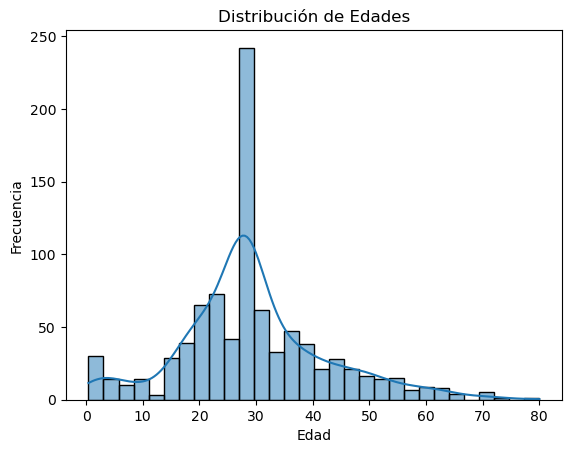

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de las edades de los pasajeros


sns.histplot(df_titanic['Age'], bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

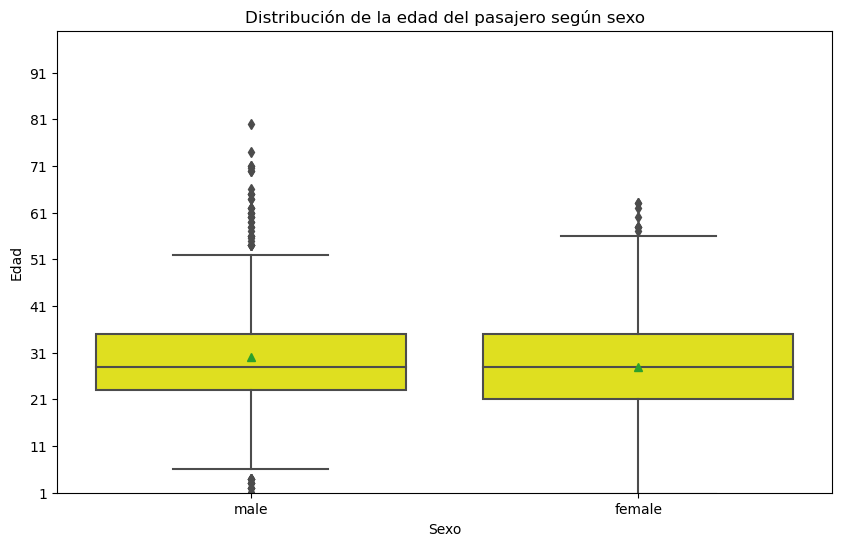

In [22]:
#Identificación de la distribución de las edades de los pasajeros según el género del mismo

# Tamaño del gráfico

plt.figure(figsize=(10, 6))

# Creación del boxplot

boxplot_edades = sns.boxplot(x=df_titanic['Sex'], y=df_titanic['Age'], color="yellow", showmeans=True)

# Etiquetas y titulos

boxplot_edades.set_xlabel('Sexo')
boxplot_edades.set_ylabel('Edad')
boxplot_edades.set_ylim(1, 100)
boxplot_edades.set_yticks(range(1, 100, 10))
boxplot_edades.set_title('Distribución de la edad del pasajero según sexo')

# Establecemos la etiquetas en años


plt.show()

**Análisis**

PENDIENTE

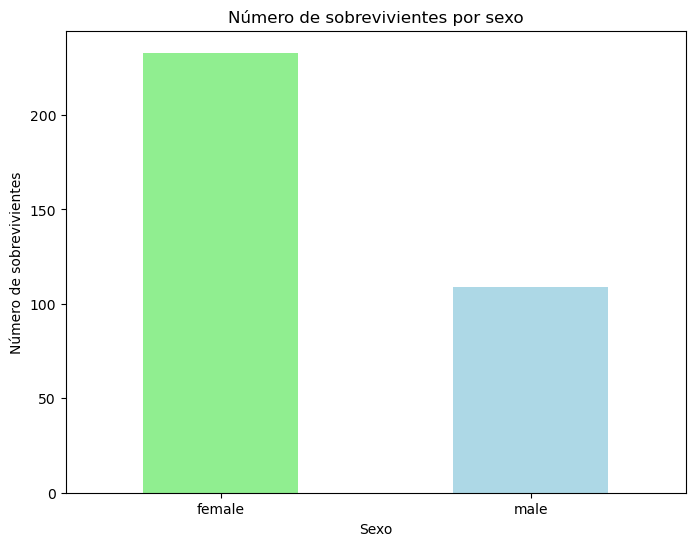

In [32]:
#Identificación de la relación que hay entre los sobrevivientes y el sexo


survived_by_sex = df_titanic.groupby('Sex')['Survived'].sum()

# Gráfico de barras


plt.figure(figsize=(8, 6))
survived_by_sex.plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Número de sobrevivientes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de sobrevivientes')
plt.xticks(rotation=0)
grouped_data = df.groupby(['sexo', 'supervivencia']).size().unstack()plt.show()

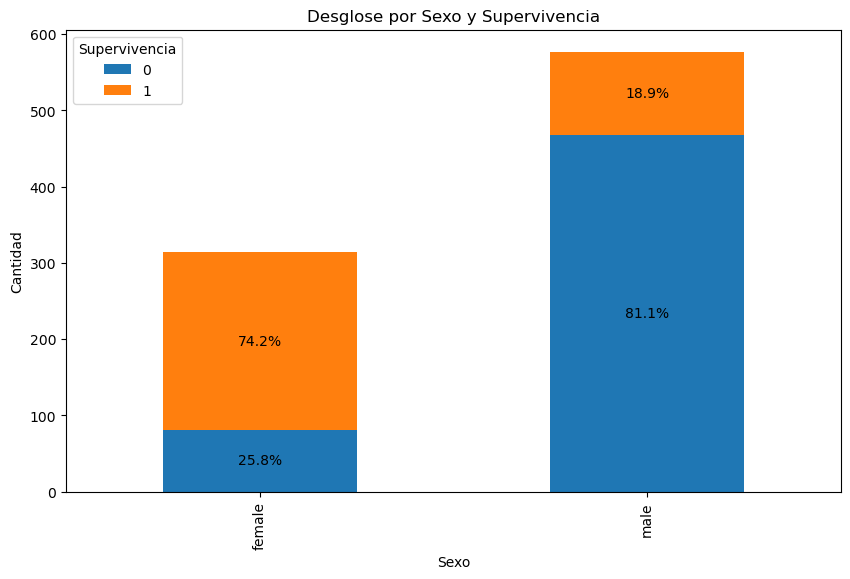

In [36]:
grouped_data = df_titanic.groupby(['Sex', 'Survived']).size().unstack()

percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Comparación de superviencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    labels = [f'{v.get_height() / grouped_data.sum(axis=1)[i] * 100:.1f}%' if v.get_height() > 0 else '' for i, v in enumerate(container)]
    ax.bar_label(container, labels=labels, label_type='center')

# Mostrar el gráfico
plt.show()

**Análisis**

PENDIENTE

In [40]:
df_titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

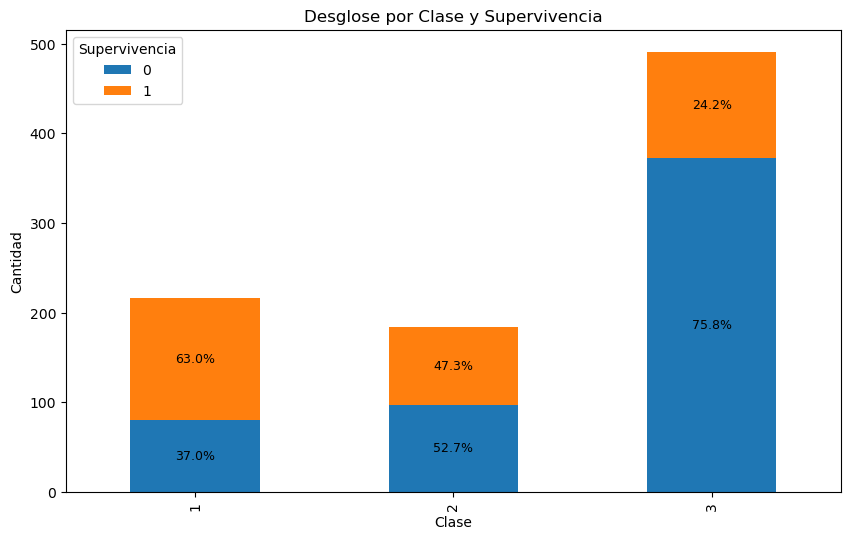

In [44]:
# Agrupar por clase y supervivencia y contar las ocurrencias
grouped_data = df_titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Calcular porcentajes
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Desglose por Clase y Supervivencia')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    # Obtener los índices del DataFrame agrupado
    index = grouped_data.index
    for i, v in enumerate(container):
        # Obtener el índice actual
        idx = index[i]
        # Obtener el valor del porcentaje correspondiente
        height = v.get_height()
        if height > 0:
            percentage = height / grouped_data.loc[idx].sum() * 100
            ax.annotate(f'{percentage:.1f}%', 
                        (v.get_x() + v.get_width() / 2, v.get_y() + height / 2),
                        ha='center', va='center', fontsize=9, color='black')

# Mostrar el gráfico
plt.show()

**Análisis**

PENDIENTE